In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.drop('RowNumber', axis = 'columns', inplace = True)
df.drop('CustomerId', axis = 'columns', inplace = True)
df.drop('Surname', axis = 'columns', inplace = True)

In [17]:
Ext_NO = df[df.Exited == 0].Tenure
Ext_YES = df[df.Exited == 1].Tenure

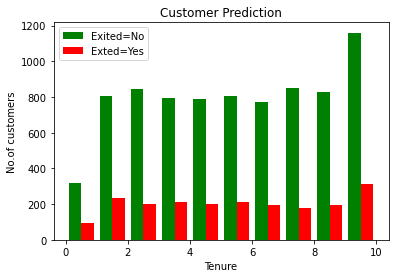

In [18]:
plt.xlabel('Tenure')
plt.ylabel('No.of customers')
plt.title('Customer Prediction')
plt.hist([Ext_NO,Ext_YES], color = ['green', 'red'], label = ['Exited=No', 'Exted=Yes'])
plt.legend()

In [19]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace = True)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [21]:
one_hot = pd.get_dummies(df['Geography'])
df = df.join(one_hot)
df.drop('Geography', axis = 1, inplace = True)

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [24]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([keras.layers.Dense(30, activation = 'relu'),
                          keras.layers.Dense(15, activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid')])

In [25]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 645.4672 - accuracy: 0.6267
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 39.7789 - accuracy: 0.6378
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 45.1663 - accuracy: 0.6471
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 41.0481 - accuracy: 0.6392
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 39.6550 - accuracy: 0.6446
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 39.5323 - accuracy: 0.6409
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 40.4845 - accuracy: 0.6441
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 42.1954 - accuracy: 0.6389
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 41.5467 - accuracy: 0.6420
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 39.67

250/250 [==============================] - 0s 2ms/step - loss: 14.6706 - accuracy: 0.6736
Epoch 81/100
250/250 [==============================] - 0s 2ms/step - loss: 14.2092 - accuracy: 0.6733
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 15.3146 - accuracy: 0.6676
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 14.9106 - accuracy: 0.6752
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 14.1540 - accuracy: 0.6739
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 13.2235 - accuracy: 0.6762
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 17.4943 - accuracy: 0.6710
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 12.1954 - accuracy: 0.6829
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 11.0328 - accuracy: 0.6875
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 13.0157 - 